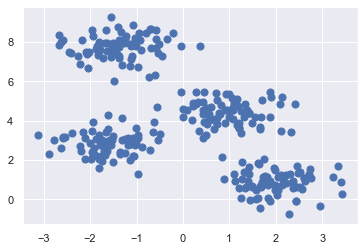

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs
x_test,y_test = make_blobs(n_samples = 300 , centers = 4 , cluster_std = 0.6 , random_state =4)
plt.scatter(x[:,0],x[:,1],s=50)


In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_test)
y_pred = kmeans.predict(x_test)
means = kmeans.cluster_centers_[kmeans.predict(x_test)] # resturn the mean value of each point
print(x_test)
means

[[ 3.26478718e+00 -5.56939581e+00]
 [ 8.66976400e+00  4.10979732e+00]
 [ 1.06349188e+01  5.30006373e+00]
 [ 1.01653527e+01  6.74019238e-01]
 [ 9.35101820e+00  4.40689073e+00]
 [ 4.56270653e+00 -5.40246102e+00]
 [ 9.48947453e+00 -9.66084675e+00]
 [ 9.51888151e+00  3.67578903e-01]
 [ 9.74487768e+00  1.56051796e+00]
 [ 4.22717021e+00 -5.92689435e+00]
 [ 1.00217271e+01 -9.59024741e+00]
 [ 8.52789299e+00 -1.04889198e+01]
 [ 7.91273162e+00  5.80034769e-01]
 [ 1.02822681e+01  3.11326803e+00]
 [ 8.94986128e+00  1.27011577e+00]
 [ 5.57755455e+00 -5.62417765e+00]
 [ 1.04842428e+01 -9.75255780e+00]
 [ 9.21345141e+00  4.68590856e+00]
 [ 3.41113292e+00 -5.85555494e+00]
 [ 9.36377791e+00  6.56135498e-01]
 [ 9.06946470e+00 -9.78783686e+00]
 [ 9.33968610e+00  5.34358658e+00]
 [ 9.53439747e+00  5.41805919e+00]
 [ 8.92310499e+00 -9.47580123e+00]
 [ 3.80065376e+00 -5.57899382e+00]
 [ 8.96082823e+00 -1.00102859e+01]
 [ 4.18394512e+00 -5.43539406e+00]
 [ 9.21196533e+00  4.57106360e+00]
 [ 1.03727617e+01  3

array([[ 3.98763431, -5.64641882],
       [ 9.55224009,  4.34589038],
       [ 9.55224009,  4.34589038],
       [ 9.40771062,  0.93935012],
       [ 9.55224009,  4.34589038],
       [ 3.98763431, -5.64641882],
       [ 9.6142291 , -9.81108184],
       [ 9.40771062,  0.93935012],
       [ 9.40771062,  0.93935012],
       [ 3.98763431, -5.64641882],
       [ 9.6142291 , -9.81108184],
       [ 9.6142291 , -9.81108184],
       [ 9.40771062,  0.93935012],
       [ 9.55224009,  4.34589038],
       [ 9.40771062,  0.93935012],
       [ 3.98763431, -5.64641882],
       [ 9.6142291 , -9.81108184],
       [ 9.55224009,  4.34589038],
       [ 3.98763431, -5.64641882],
       [ 9.40771062,  0.93935012],
       [ 9.6142291 , -9.81108184],
       [ 9.55224009,  4.34589038],
       [ 9.55224009,  4.34589038],
       [ 9.6142291 , -9.81108184],
       [ 3.98763431, -5.64641882],
       [ 9.6142291 , -9.81108184],
       [ 3.98763431, -5.64641882],
       [ 9.55224009,  4.34589038],
       [ 9.55224009,

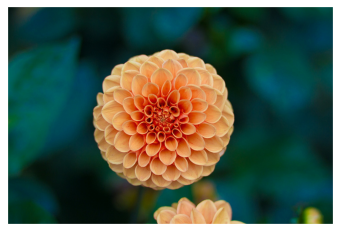

In [86]:
#exampl1 : color compression
from sklearn.datasets import load_sample_image
image = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [54]:
image.shape

(427, 640, 3)

In [58]:
#to make pixels in 0 to 1 range
data = image/255

In [79]:
data = data.reshape(427*640,3)
data.shape

array([2, 0, 1, 3, 4])

In [124]:
def plot_pixel(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
#choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] #random distinct 10000 no.selected from [0,273280)
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1,2,figsize=(16,6))#creates a platform/shape to show images
    ax[0].scatter(R, G,color=colors, marker='*')
    ax[0].set(xlabel ='Red', ylabel = 'Green', xlim=(0,1), ylim=(0,1))
    ax[1].scatter(R,B,color=colors, marker='.')
    ax[1].set(xlabel ='Red', ylabel = 'Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20);
    

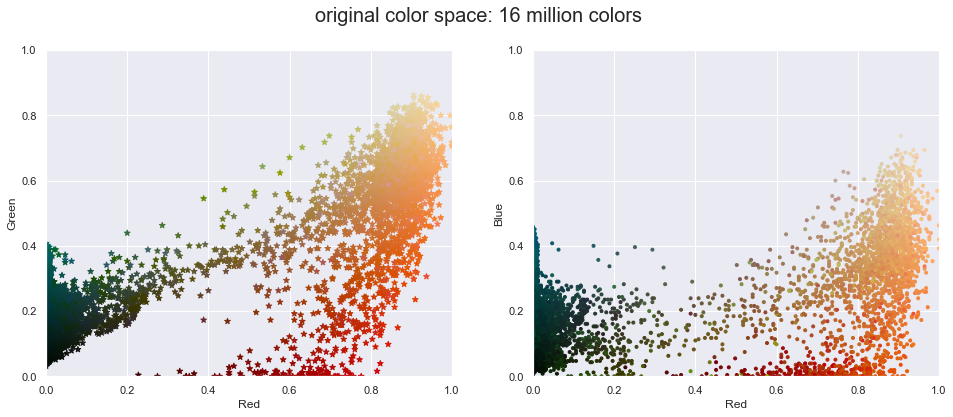

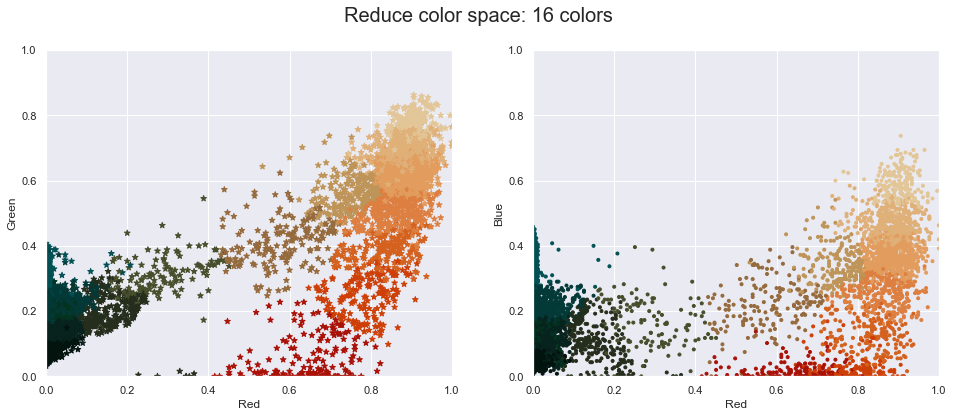

In [125]:
plot_pixel(data,title = "original color space: 16 million colors")
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)fig, ax = plt.subplots(1,2,figsize=(16,6))
kmeans.fit(data)
new_color = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixel(data, colors = new_color, title = "Reduce color space: 16 colors")


Text(0.5, 1.0, 'compressed image')

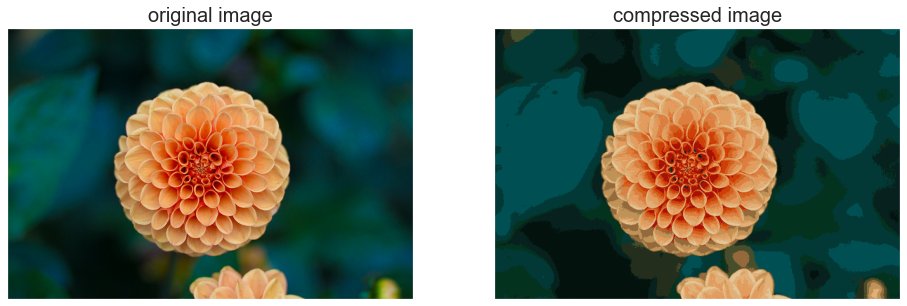

In [138]:
image_recolored = new_color.reshape(image.shape)
fig, ax = plt.subplots(1,2,figsize=(16,6),
                       subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image)
ax[0].set_title("original image",size=20)
ax[1].imshow(image_recolored)
ax[1].set_title("compressed image",size=20)